<a href="https://www.kaggle.com/code/yousefroshdy/linear-regression-ai-t-task1?scriptVersionId=118398236" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price/sample_submission.csv
/kaggle/input/house-price/data_description.txt
/kaggle/input/house-price/train.csv
/kaggle/input/house-price/test.csv


In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/house-price/train.csv')

In [4]:
X = df['GrLivArea']
Y = df['SalePrice']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.7, random_state = 100)

print("Row of X_train" + '_' + str(f"{len(X_train):,}"))
print("Row of y_train" + '_' + str(f"{len(y_train):,}"))

print("Row of X_test" + '_' + str(f"{len(X_test):,}"))
print("Row of y_test" + '_' + str(f"{len(y_test):,}"))

Row of X_train_1,021
Row of y_train_1,021
Row of X_test_439
Row of y_test_439


In [6]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

print("Intercept added to the linear regression model" + '_' + str(X_train_sm))

Intercept added to the linear regression model_      const  GrLivArea
318     1.0       2646
239     1.0       1487
986     1.0       1635
1416    1.0       2290
390     1.0       1367
...     ...        ...
802     1.0       1456
53      1.0       1842
350     1.0       1869
79      1.0       1230
792     1.0       2013

[1021 rows x 2 columns]


In [7]:
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     960.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          4.71e-149
Time:                        18:33:03   Log-Likelihood:                -12625.
No. Observations:                1021   AIC:                         2.525e+04
Df Residuals:                    1019   BIC:                         2.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.335e+04   5377.544      4.342      0.000    1.28e+04    3.39e+04
GrLivArea    103.5867      3.343     30.985      0.000      97.027     110.147
==============================================================================
Omnibus:                      169.213   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2417.754
Skew:                           0.235   Prob(JB):                         0.00
Kurtosis:                      10.524   Cond. No.                     4.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared = 0.485
F-static = 960.1

**coefficient = (2.335e+041, 103.5867)**

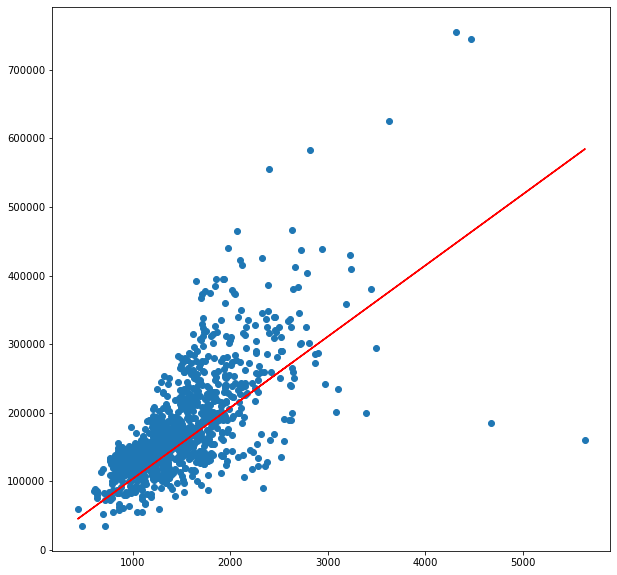

In [8]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.scatter(X_train, y_train)

plt.plot(X_train, 47.34718807+103.5867*X_train, 'r')
plt.show()

In [9]:
x_test_sm = sm.add_constant(X_test)
                           
y_test_pred=(lr.predict(x_test_sm))
y_test_pred

1436    112848.248005
57      201518.492551
780     153143.487641
382     209494.671091
1170    139159.278513
            ...      
555     131908.207113
399     183908.747723
545     249479.150525
266     179868.865086
210     112848.248005
Length: 439, dtype: float64

In [10]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.5386035609114374

In [11]:
import math
def MSE(y_actual, y_pred):
    lenght_of_data = len(y_pred)
    error=0
    for i in range(lenght_of_data):
        difference = y_actual[i] - y_pred[i]
        error += difference**2
        mse = math.sqrt(error)/lenght_of_data
    return mse

In [12]:
mean_square_error = MSE(list(y_test), list(y_test_pred))
mean_square_error

2600.9832579872304